## Importing Libraries and Modules

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import statsmodels.api as sm
from pylab import rcParams
import itertools
import warnings
warnings.filterwarnings("ignore")

matplotlib.rc('xtick', labelsize=12) 
matplotlib.rc('ytick', labelsize=12) 
matplotlib.rcParams['axes.labelsize'] = 14

## Reading the training dataset

In [2]:
df_train = pd.read_csv("dataset/train_csv.csv")
df_train.head()

,id,time,feature
0,0,2019-03-19 00:00:00,237.97
1,1,2019-03-19 00:00:10,57.93
2,2,2019-03-19 00:00:20,90.53
3,3,2019-03-19 00:00:30,260.75
4,4,2019-03-19 00:00:40,49.70


In [3]:
df_train.drop("id", axis=1, inplace=True)
df_train.isnull().sum()

time       0
feature    0
dtype: int64

In [4]:
df_train['time'].min(), df_train['time'].max()

('2019-03-19 00:00:00', '2019-03-19 00:13:10')

In [5]:
df_train = df_train.set_index('time')
df_train.index

Index(['2019-03-19 00:00:00', '2019-03-19 00:00:10', '2019-03-19 00:00:20',
       '2019-03-19 00:00:30', '2019-03-19 00:00:40', '2019-03-19 00:00:50',
       '2019-03-19 00:01:00', '2019-03-19 00:01:10', '2019-03-19 00:01:20',
       '2019-03-19 00:01:30', '2019-03-19 00:01:40', '2019-03-19 00:01:50',
       '2019-03-19 00:02:00', '2019-03-19 00:02:10', '2019-03-19 00:02:20',
       '2019-03-19 00:02:30', '2019-03-19 00:02:40', '2019-03-19 00:02:50',
       '2019-03-19 00:03:00', '2019-03-19 00:03:10', '2019-03-19 00:03:20',
       '2019-03-19 00:03:30', '2019-03-19 00:03:40', '2019-03-19 00:03:50',
       '2019-03-19 00:04:00', '2019-03-19 00:04:10', '2019-03-19 00:04:20',
       '2019-03-19 00:04:30', '2019-03-19 00:04:40', '2019-03-19 00:04:50',
       '2019-03-19 00:05:00', '2019-03-19 00:05:10', '2019-03-19 00:05:20',
       '2019-03-19 00:05:30', '2019-03-19 00:05:40', '2019-03-19 00:05:50',
       '2019-03-19 00:06:00', '2019-03-19 00:06:10', '2019-03-19 00:06:20',
       '2019

## Visualizations

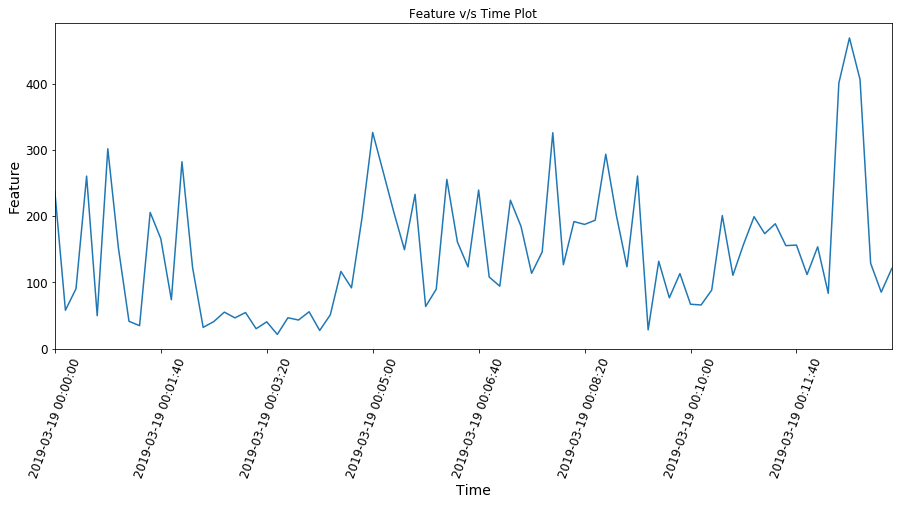

In [6]:
y = df_train['feature']
y.plot(figsize=(15, 6))

plt.title('Feature v/s Time Plot')
plt.xticks(rotation=70)
plt.xlabel("Time")
plt.ylabel("Feature")

plt.show()

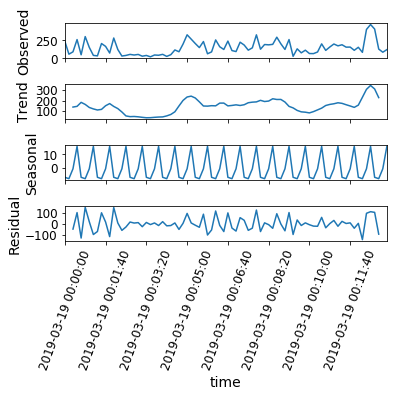

In [7]:
decompPred = sm.tsa.seasonal_decompose(df_train.feature, model="additive", freq=4)
decompPred.plot()
plt.xticks(rotation=70)
plt.show()

## Finding optimal parameters

In [8]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [9]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
        except:
            continue

In [10]:
results = mod.fit()
print("ARIMA{}x{} - AIC:{}".format(param, param_seasonal, results.aic))

ARIMA(1, 1, 1)x(1, 1, 1, 12) - AIC:657.6512317788277


## Model Training

In [11]:
model = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = model.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3942      0.138      2.849      0.004       0.123       0.665
ma.L1         -1.0000    311.691     -0.003      0.997    -611.902     609.902
ar.S.L12      -0.2223      0.324     -0.686      0.492      -0.857       0.413
ma.S.L12      -0.4031      0.320     -1.260      0.208      -1.030       0.224
sigma2      1.083e+04   3.37e+06      0.003      0.997    -6.6e+06    6.62e+06


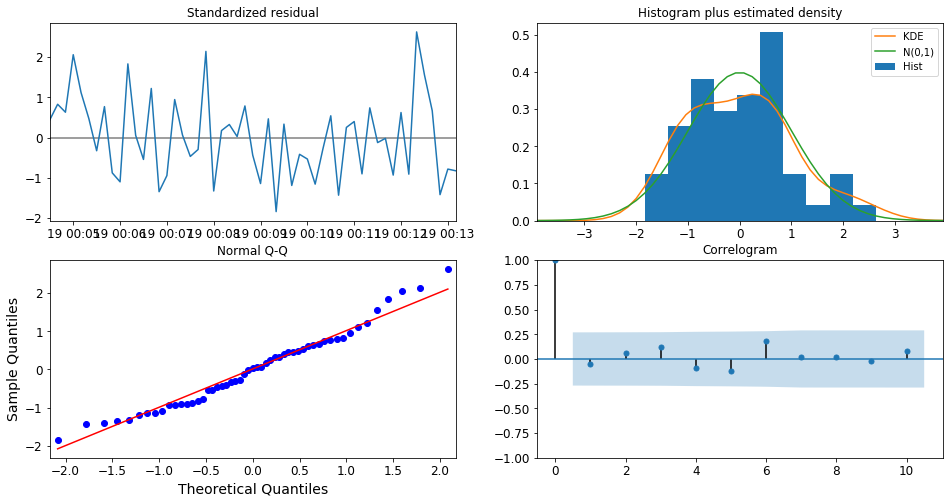

In [12]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

## Reading the testing dataset

In [13]:
df_test = pd.read_csv("dataset/test_csv.csv")
df_test.drop("id", axis=1, inplace=True)
df_test.head()

,time
0,2019-03-19 00:13:20
1,2019-03-19 00:13:30
2,2019-03-19 00:13:40
3,2019-03-19 00:13:50
4,2019-03-19 00:14:00


In [14]:
df_test = df_test.set_index('time')
df_test.index

Index(['2019-03-19 00:13:20', '2019-03-19 00:13:30', '2019-03-19 00:13:40',
       '2019-03-19 00:13:50', '2019-03-19 00:14:00', '2019-03-19 00:14:10',
       '2019-03-19 00:14:20', '2019-03-19 00:14:30', '2019-03-19 00:14:40',
       '2019-03-19 00:14:50', '2019-03-19 00:15:00', '2019-03-19 00:15:10',
       '2019-03-19 00:15:20', '2019-03-19 00:15:30', '2019-03-19 00:15:40',
       '2019-03-19 00:15:50', '2019-03-19 00:16:00', '2019-03-19 00:16:10',
       '2019-03-19 00:16:20', '2019-03-19 00:16:30', '2019-03-19 00:16:40',
       '2019-03-19 00:16:50', '2019-03-19 00:17:00', '2019-03-19 00:17:10',
       '2019-03-19 00:17:20', '2019-03-19 00:17:30', '2019-03-19 00:17:40',
       '2019-03-19 00:17:50', '2019-03-19 00:18:00', '2019-03-19 00:18:10',
       '2019-03-19 00:18:20', '2019-03-19 00:18:30', '2019-03-19 00:18:40',
       '2019-03-19 00:18:50', '2019-03-19 00:19:00', '2019-03-19 00:19:10',
       '2019-03-19 00:19:20', '2019-03-19 00:19:30', '2019-03-19 00:19:40',
       '2019

## Model Predictions

In [15]:
forecast = results.forecast(steps=40)
df_test['feature'] = forecast
df_test.head()

,feature
time,
2019-03-19 00:13:20,106.877080
2019-03-19 00:13:30,150.195746
2019-03-19 00:13:40,152.372119
2019-03-19 00:13:50,170.157168
2019-03-19 00:14:00,144.927629


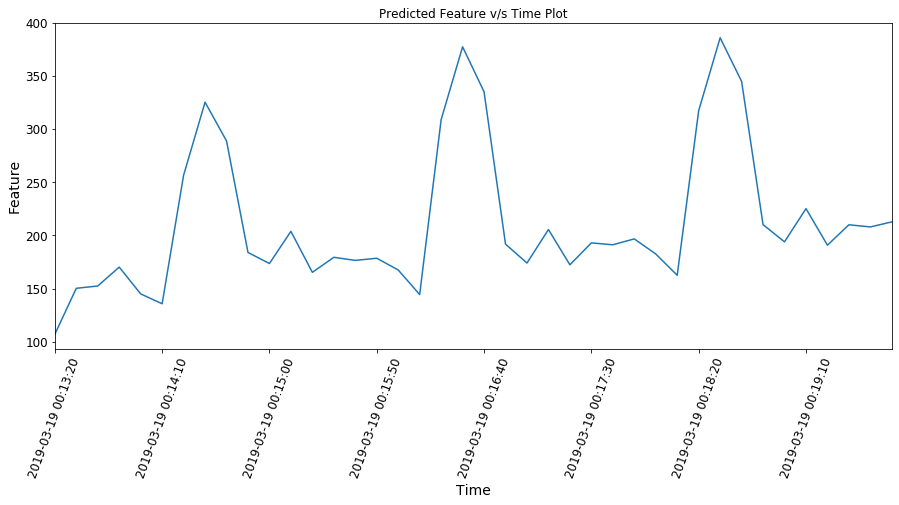

In [16]:
y = df_test['feature']
y.plot(figsize=(15, 6))

plt.title('Predicted Feature v/s Time Plot')
plt.xticks(rotation=70)
plt.xlabel("Time")
plt.ylabel("Feature")

plt.show()

In [17]:
df_test.to_csv("prediction.csv")  